In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [2]:
# read processed data
df = pd.read_csv('../data/processed_data.csv')

In [3]:
df

,transcript_id,transcript_position,label,sequence_key,sequence_-1,sequence_0,sequence_+1,dwell_time_-1,sd_-1,mean_-1,dwell_time_0,sd_0,mean_0,dwell_time_+1,sd_+1,mean_+1
0,ENST00000000233,244,0,AAGACCA,AAGAC,AGACC,GACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,0,AAGACCA,AAGAC,AGACC,GACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,0,AAGACCA,AAGAC,AGACC,GACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,0,AAGACCA,AAGAC,AGACC,GACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,0,AAGACCA,AAGAC,AGACC,GACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,0,TTGACAT,TTGAC,TGACA,GACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4
11027102,ENST00000641834,1693,0,TTGACAT,TTGAC,TGACA,GACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6
11027103,ENST00000641834,1693,0,TTGACAT,TTGAC,TGACA,GACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3
11027104,ENST00000641834,1693,0,TTGACAT,TTGAC,TGACA,GACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8


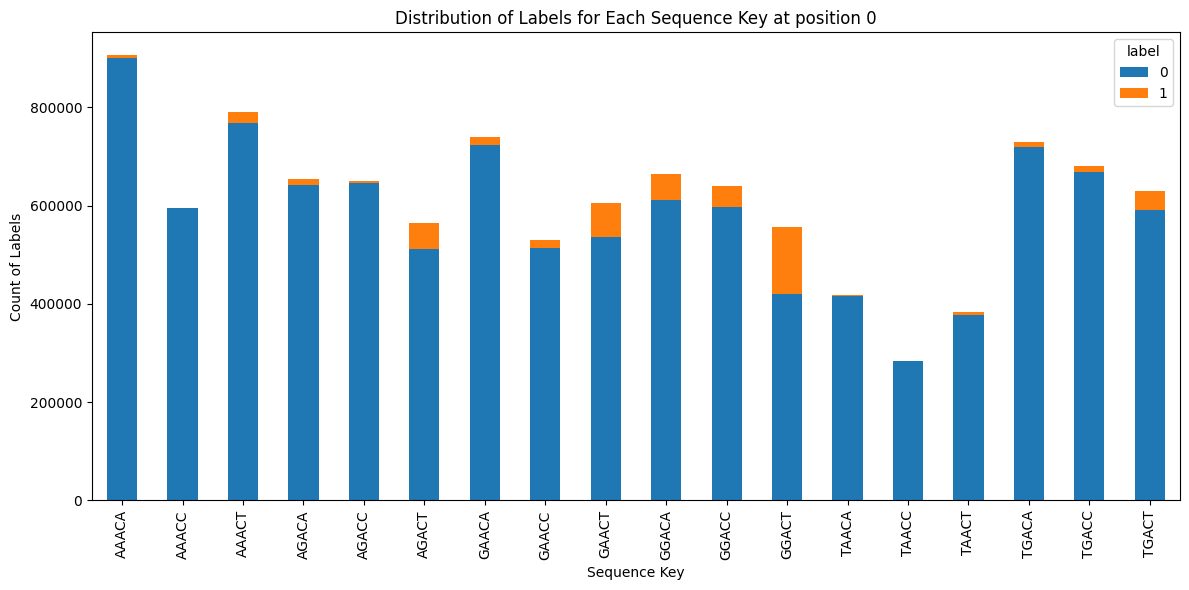

In [4]:
# Group the data by sequence_key and label
sequence_label_group = df.groupby(['sequence_0', 'label']).size().unstack(fill_value=0)

# Plot the distribution of labels for each sequence_key
sequence_label_group.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set plot title and labels
plt.title('Distribution of Labels for Each Sequence Key at position 0')
plt.xlabel('Sequence Key')
plt.ylabel('Count of Labels')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


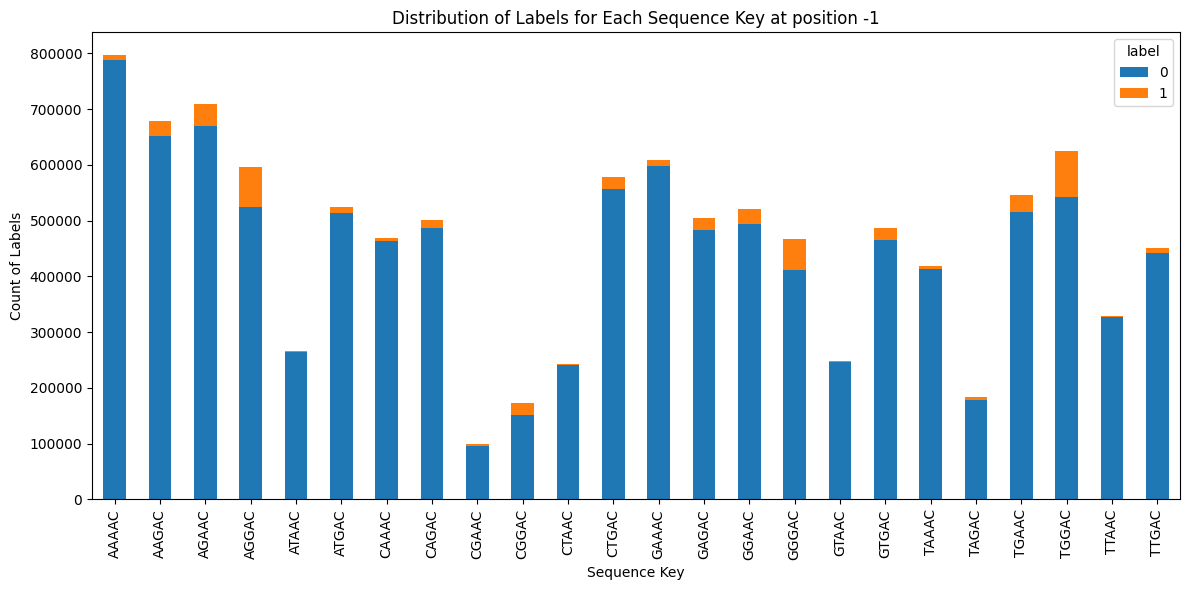

In [5]:
# Group the data by sequence_key and label
sequence_label_group = df.groupby(['sequence_-1', 'label']).size().unstack(fill_value=0)

# Plot the distribution of labels for each sequence_key
sequence_label_group.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set plot title and labels
plt.title('Distribution of Labels for Each Sequence Key at position -1')
plt.xlabel('Sequence Key')
plt.ylabel('Count of Labels')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


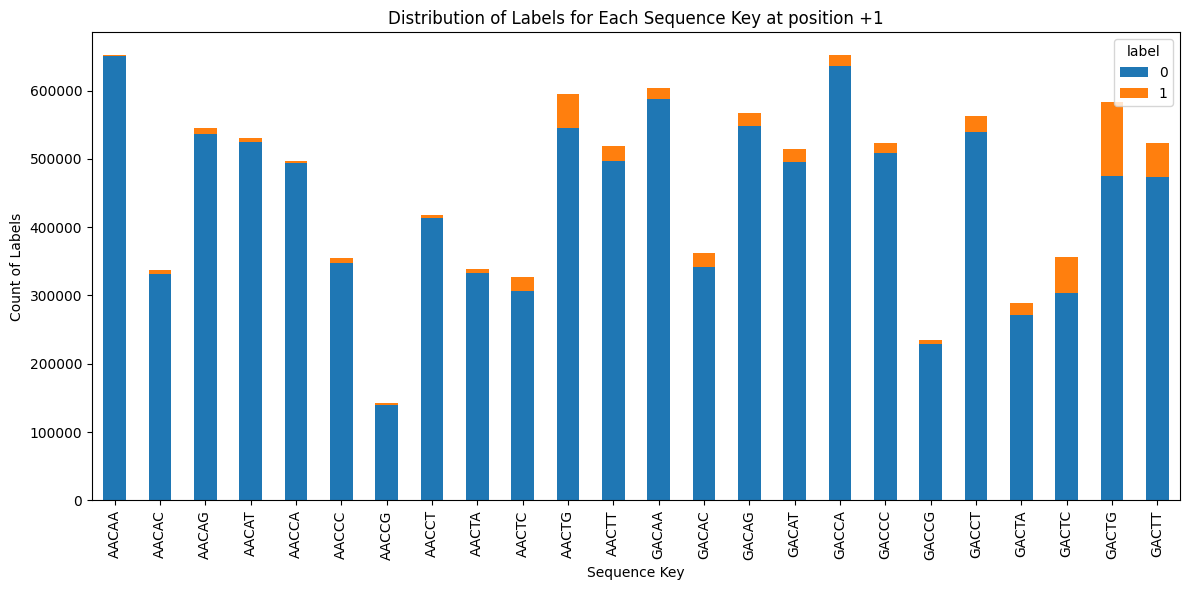

In [6]:
# Group the data by sequence_key and label
sequence_label_group = df.groupby(['sequence_+1', 'label']).size().unstack(fill_value=0)

# Plot the distribution of labels for each sequence_key
sequence_label_group.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set plot title and labels
plt.title('Distribution of Labels for Each Sequence Key at position +1')
plt.xlabel('Sequence Key')
plt.ylabel('Count of Labels')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


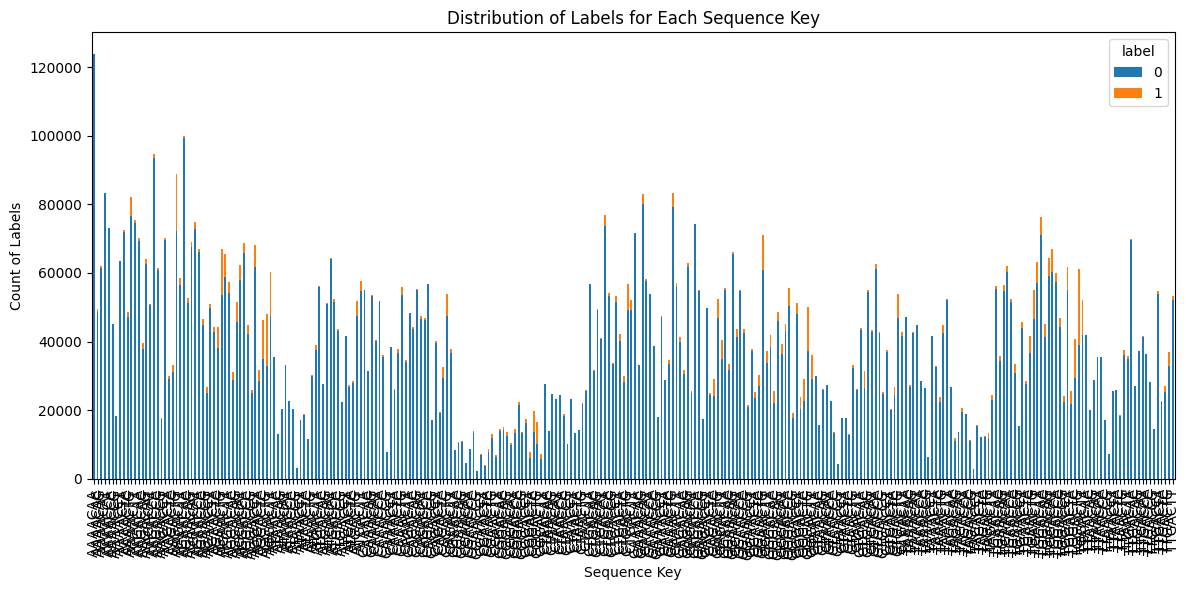

In [7]:
# Group the data by sequence_key and label
sequence_label_group = df.groupby(['sequence_key', 'label']).size().unstack(fill_value=0)

# Plot the distribution of labels for each sequence_key
sequence_label_group.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set plot title and labels
plt.title('Distribution of Labels for Each Sequence Key')
plt.xlabel('Sequence Key')
plt.ylabel('Count of Labels')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='sequence_0'>

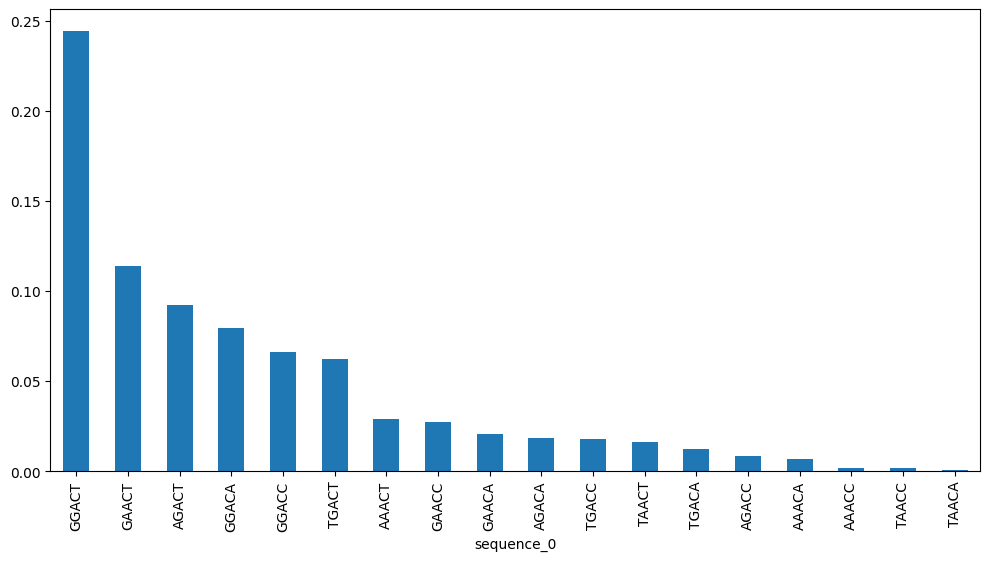

In [8]:
# Group the data by sequence_key and label
sequence_label_group = df.groupby(['sequence_0', 'label']).size().unstack(fill_value=0)
sequence_label_group['percentage_label_1'] = sequence_label_group[1] / (sequence_label_group[0] + sequence_label_group[1])
sequence_label_group = sequence_label_group.sort_values(by='percentage_label_1', ascending=False)
# plot the percentage of label 1 for each sequence_key at position 0 at descending order
sequence_label_group['percentage_label_1'].plot(kind='bar', figsize=(12, 6))


In [9]:
# Function to normalize a given column
def normalize_column(col):
    return (col - col.mean()) / col.std()

# Normalize the features for each column using joblib for parallel processing
columns_to_normalize = ['mean_-1', 'sd_-1', 'dwell_time_-1',
                        'mean_0', 'sd_0', 'dwell_time_0',
                        'mean_+1', 'sd_+1', 'dwell_time_+1']

# Parallelizing the normalization process
normalized_columns = Parallel(n_jobs=-1)(delayed(normalize_column)(df[col]) for col in columns_to_normalize)

# Assign the normalized columns back to the DataFrame
for col, norm_col in zip(columns_to_normalize, normalized_columns):
    df[col + '_normalized'] = norm_col

In [10]:
common_sequences = ['GGACT', 'GAACT', 'AGACT']
df_filtered = df[df['sequence_0'].isin(common_sequences)]

In [11]:
# Perform the melt operation
df_long = pd.melt(df_filtered, id_vars=['label', 'sequence_0'], 
                  value_vars=['mean_-1_normalized', 'sd_-1_normalized', 'dwell_time_-1_normalized',
                              'mean_0_normalized', 'sd_0_normalized', 'dwell_time_0_normalized',
                              'mean_+1_normalized', 'sd_+1_normalized', 'dwell_time_+1_normalized'],
                  var_name='feature_position', value_name='value')

# Create a mapping for the features and positions for better labeling in the plot
df_long['feature'] = df_long['feature_position'].str.extract(r'(mean|sd|dwell_time)')
df_long['position'] = df_long['feature_position'].str.extract(r'(-1|0|\+1)')

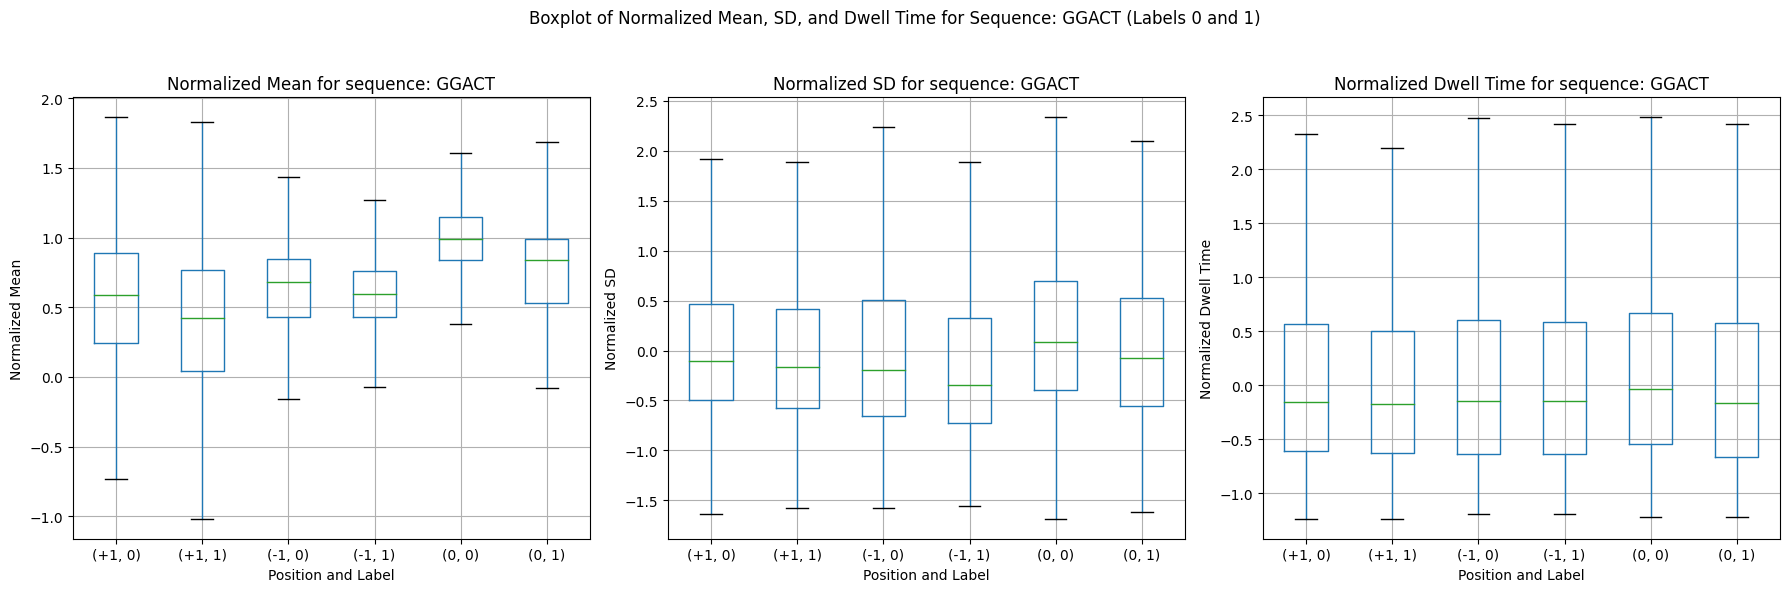

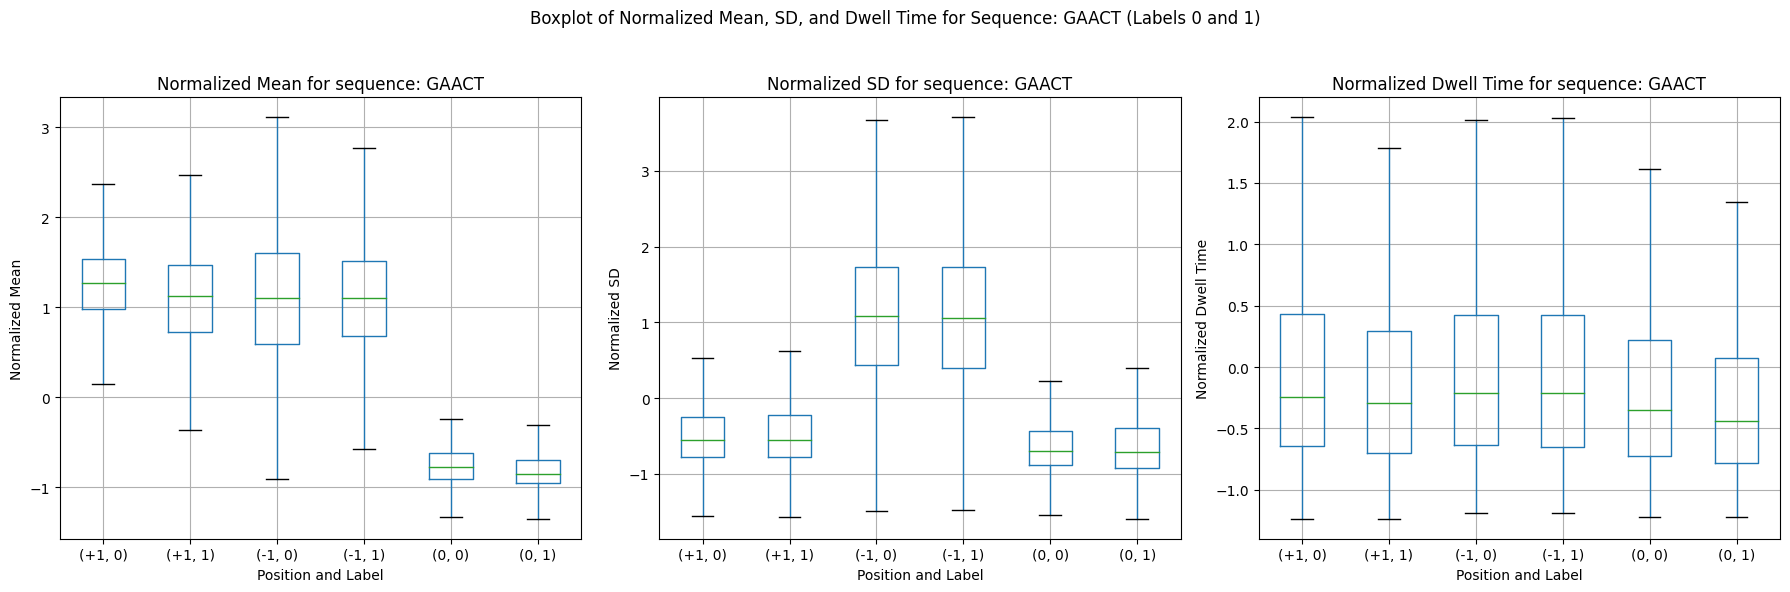

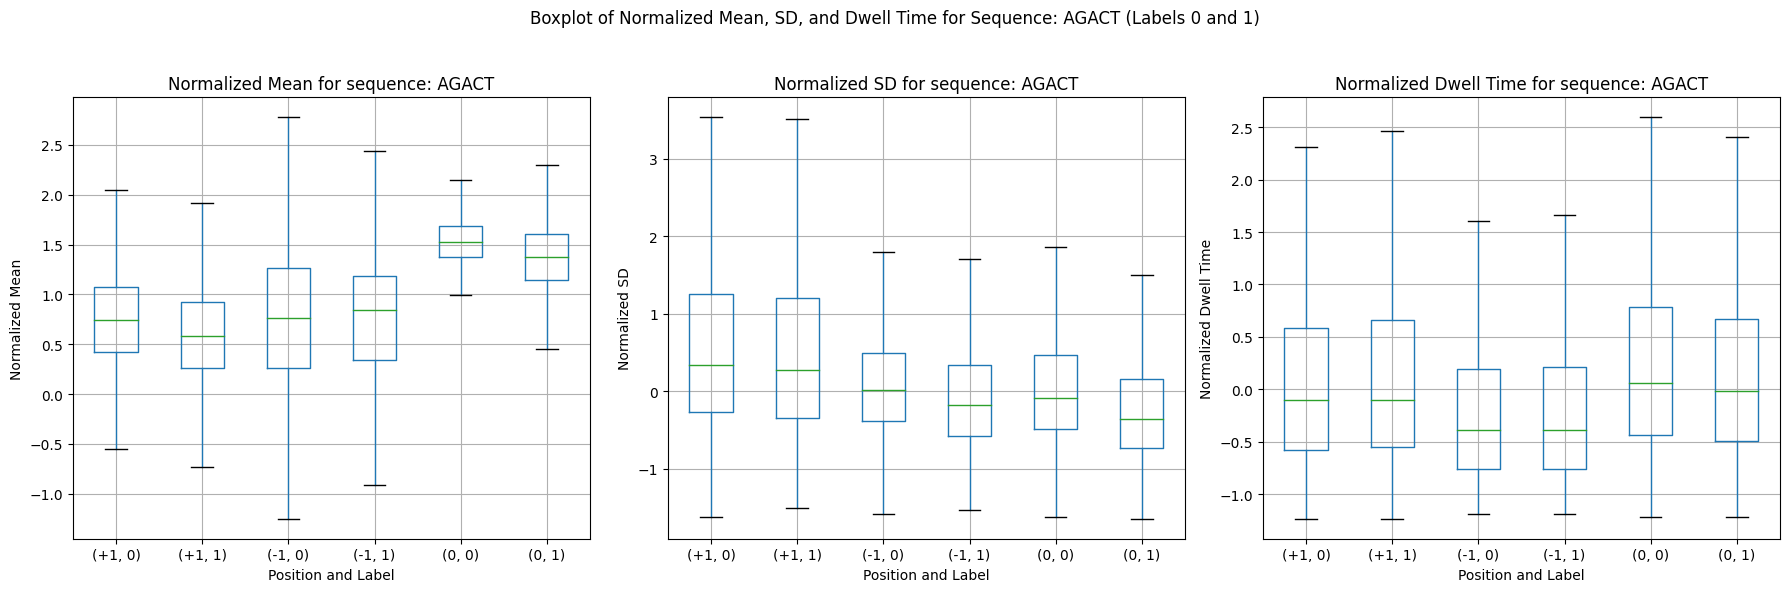

In [17]:
# Function to plot boxplots comparing label 0 and 1 for each sequence
def plot_boxplot_for_sequence(data, sequence):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    plot_boxplot(data[data['feature'] == 'mean'], sequence, ax[0], 'Normalized Mean', 'Position and Label', 'Normalized Mean')
    plot_boxplot(data[data['feature'] == 'sd'], sequence, ax[1], 'Normalized SD', 'Position and Label', 'Normalized SD')
    plot_boxplot(data[data['feature'] == 'dwell_time'], sequence, ax[2], 'Normalized Dwell Time', 'Position and Label', 'Normalized Dwell Time')

    plt.suptitle(f'Boxplot of Normalized Mean, SD, and Dwell Time for Sequence: {sequence} (Labels 0 and 1)')
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

def plot_boxplot(data, sequence, ax, title, xlabel, ylabel):
    data = data[data['sequence_0'] == sequence]
    data.boxplot(column='value', by=['position', 'label'], ax=ax, showfliers=False)  # Exclude outliers
    ax.set_title(f'{title} for sequence: {sequence}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Plot for each common sequence on a separate graph
for sequence in common_sequences:
    plot_boxplot_for_sequence(df_long, sequence)